In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [29]:
# df = pd.read_csv("survey_lung_cancer.csv")
df = pd.read_csv("breast-cancer.csv")

In [30]:
# df.drop(columns=["id"],inplace=True)
# Convert 'diagnosis' column ('M' → 0, 'B' → 1)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
# df["diagnosis"] = df["diagnosis"].map({"M":0,"B":1})
# df.head()

In [32]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [33]:
# #dependent_variable
# x = df.iloc[:,1:-1]
# x

In [34]:
# #independent_variable
# y = df.iloc[:,0:]
# # y = y.values.ravel()
# y.shape

In [35]:
# Define x (features) and y (target)
x = df.drop(columns=["diagnosis", "id"])  # Drop non-feature columns
y = df["diagnosis"]  # Target column
y
# y.shape

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [36]:
# Splitting Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train)
#Predicting the test set results
prediction1 = log_reg.predict(x_test)
prediction1

c:\Users\Abhay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [38]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(x_train, y_train)
prediction2 = knn.predict(x_test)
prediction2

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [39]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
tree.fit(x_train, y_train)
prediction3 = tree.predict(x_test)
prediction3

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [40]:
# SVM Classifier
svm = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='rbf', random_state=9, probability=True), n_jobs=-1))
svm.fit(x_train, y_train)
prediction4 = svm.predict(x_test)
prediction4

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [41]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
prediction5 = nb.predict(x_test)
prediction5

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [42]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
prediction6 = rf_classifier.predict(x_test)
prediction6

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [43]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name, results_dict):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Store results in dictionary
    results_dict[model_name] = accuracy  

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

In [44]:
# Dictionary to store accuracy results
accuracy_results = {}

# Evaluate each model
evaluate_model(y_test, prediction1, "Logistic Regression", accuracy_results)
evaluate_model(y_test, prediction2, "KNN", accuracy_results)
evaluate_model(y_test, prediction3, "Decision Tree", accuracy_results)
evaluate_model(y_test, prediction4, "SVM", accuracy_results)
evaluate_model(y_test, prediction5, "Naive Bayes", accuracy_results)
evaluate_model(y_test, prediction6, "Random Forest", accuracy_results)

Logistic Regression Metrics:
Accuracy: 0.9561
Precision: 0.9844
Recall: 0.9403
F1 Score: 0.9618

KNN Metrics:
Accuracy: 0.9123
Precision: 0.9385
Recall: 0.9104
F1 Score: 0.9242

Decision Tree Metrics:
Accuracy: 0.9298
Precision: 0.9538
Recall: 0.9254
F1 Score: 0.9394

SVM Metrics:
Accuracy: 0.9386
Precision: 0.9286
Recall: 0.9701
F1 Score: 0.9489

Naive Bayes Metrics:
Accuracy: 0.9298
Precision: 0.9403
Recall: 0.9403
F1 Score: 0.9403

Random Forest Metrics:
Accuracy: 0.9737
Precision: 0.9848
Recall: 0.9701
F1 Score: 0.9774



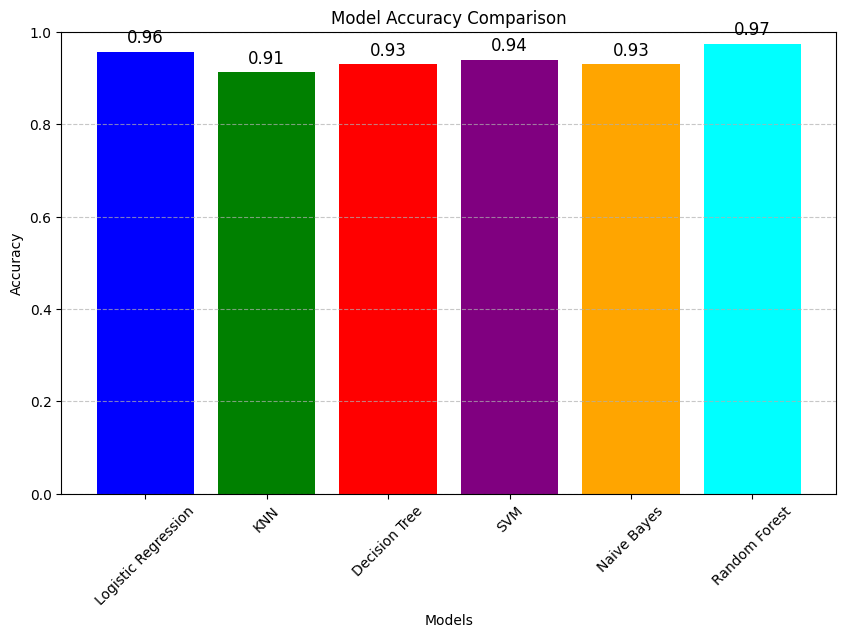

In [45]:
# **Plot Accuracy of All Models**
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on top of bars
for i, (model, acc) in enumerate(accuracy_results.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()

In [46]:
# Confusion Matrix Plotting
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

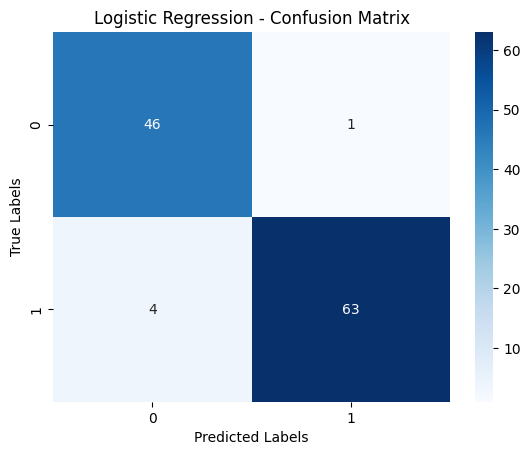

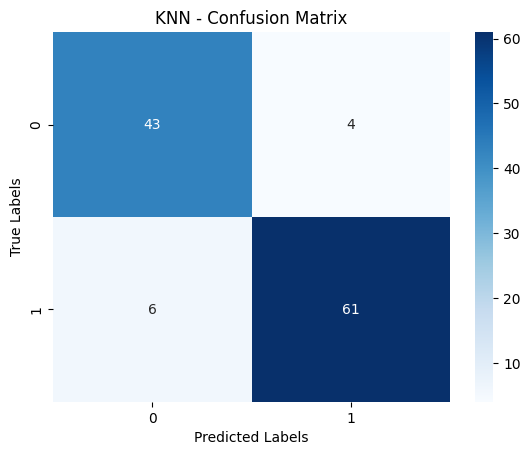

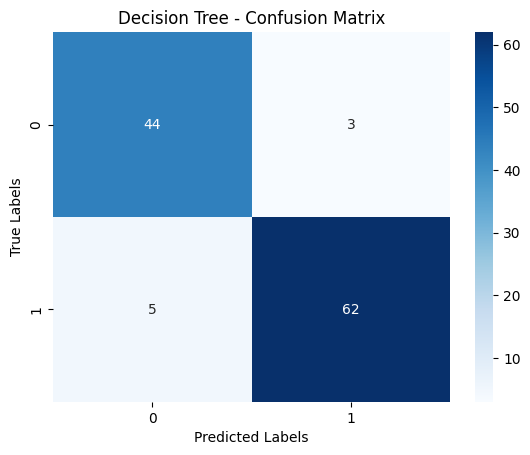

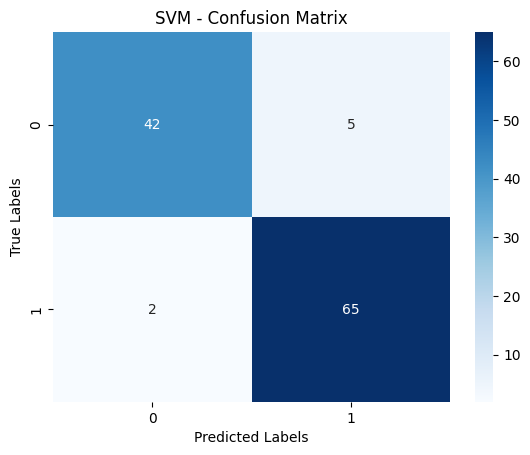

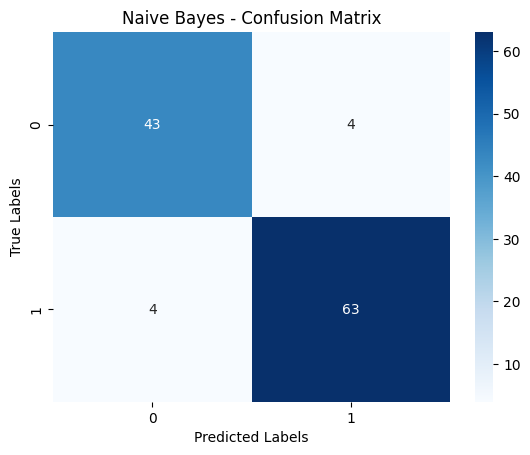

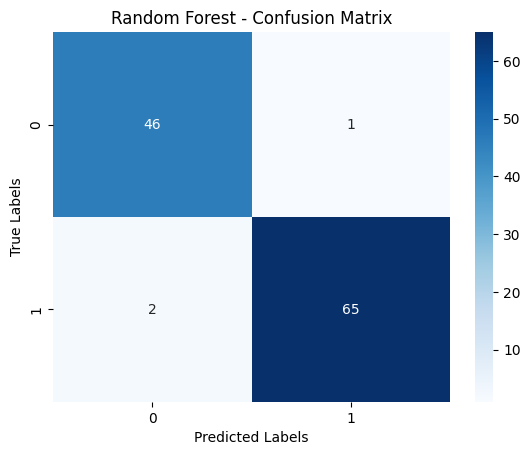

In [47]:
# Confusion Matrix Visualizations
plot_confusion_matrix(y_test, prediction1, "Logistic Regression")
plot_confusion_matrix(y_test, prediction2, "KNN")
plot_confusion_matrix(y_test, prediction3, "Decision Tree")
plot_confusion_matrix(y_test, prediction4, "SVM")
plot_confusion_matrix(y_test, prediction5, "Naive Bayes")
plot_confusion_matrix(y_test, prediction6, "Random Forest")

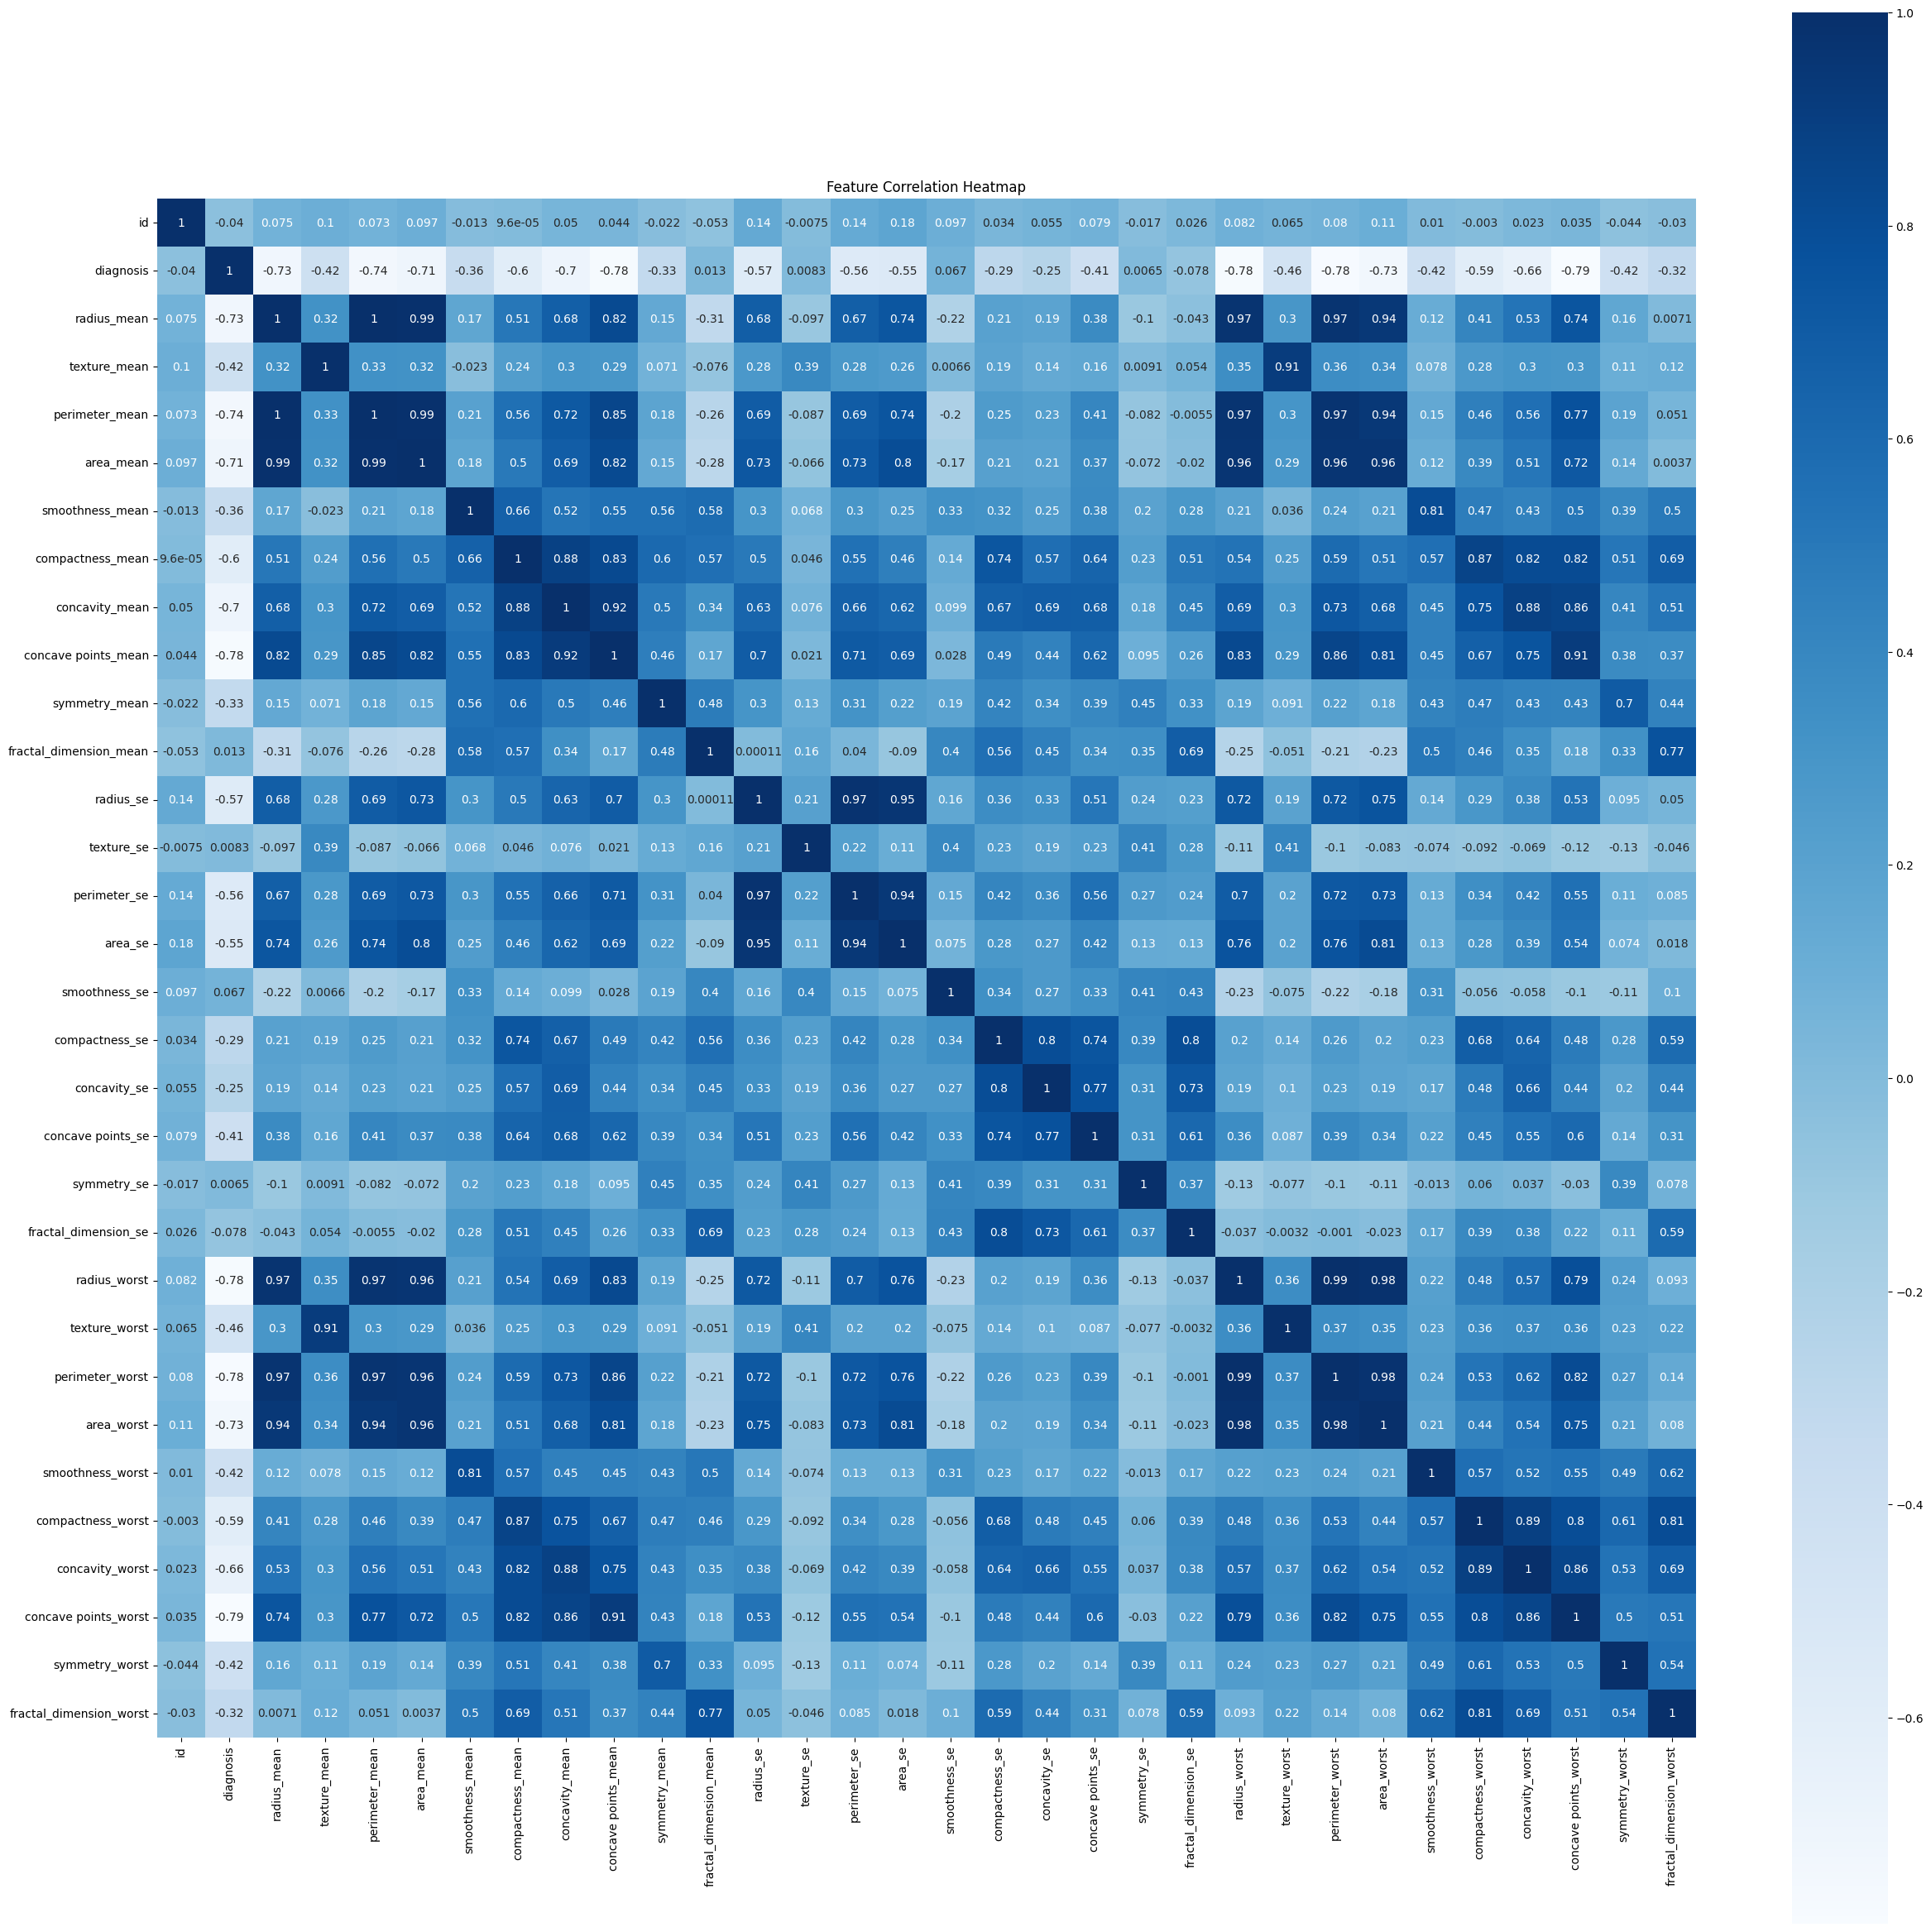

In [48]:
# Correlation Heatmap
correlation = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation, cmap="Blues", annot=True, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

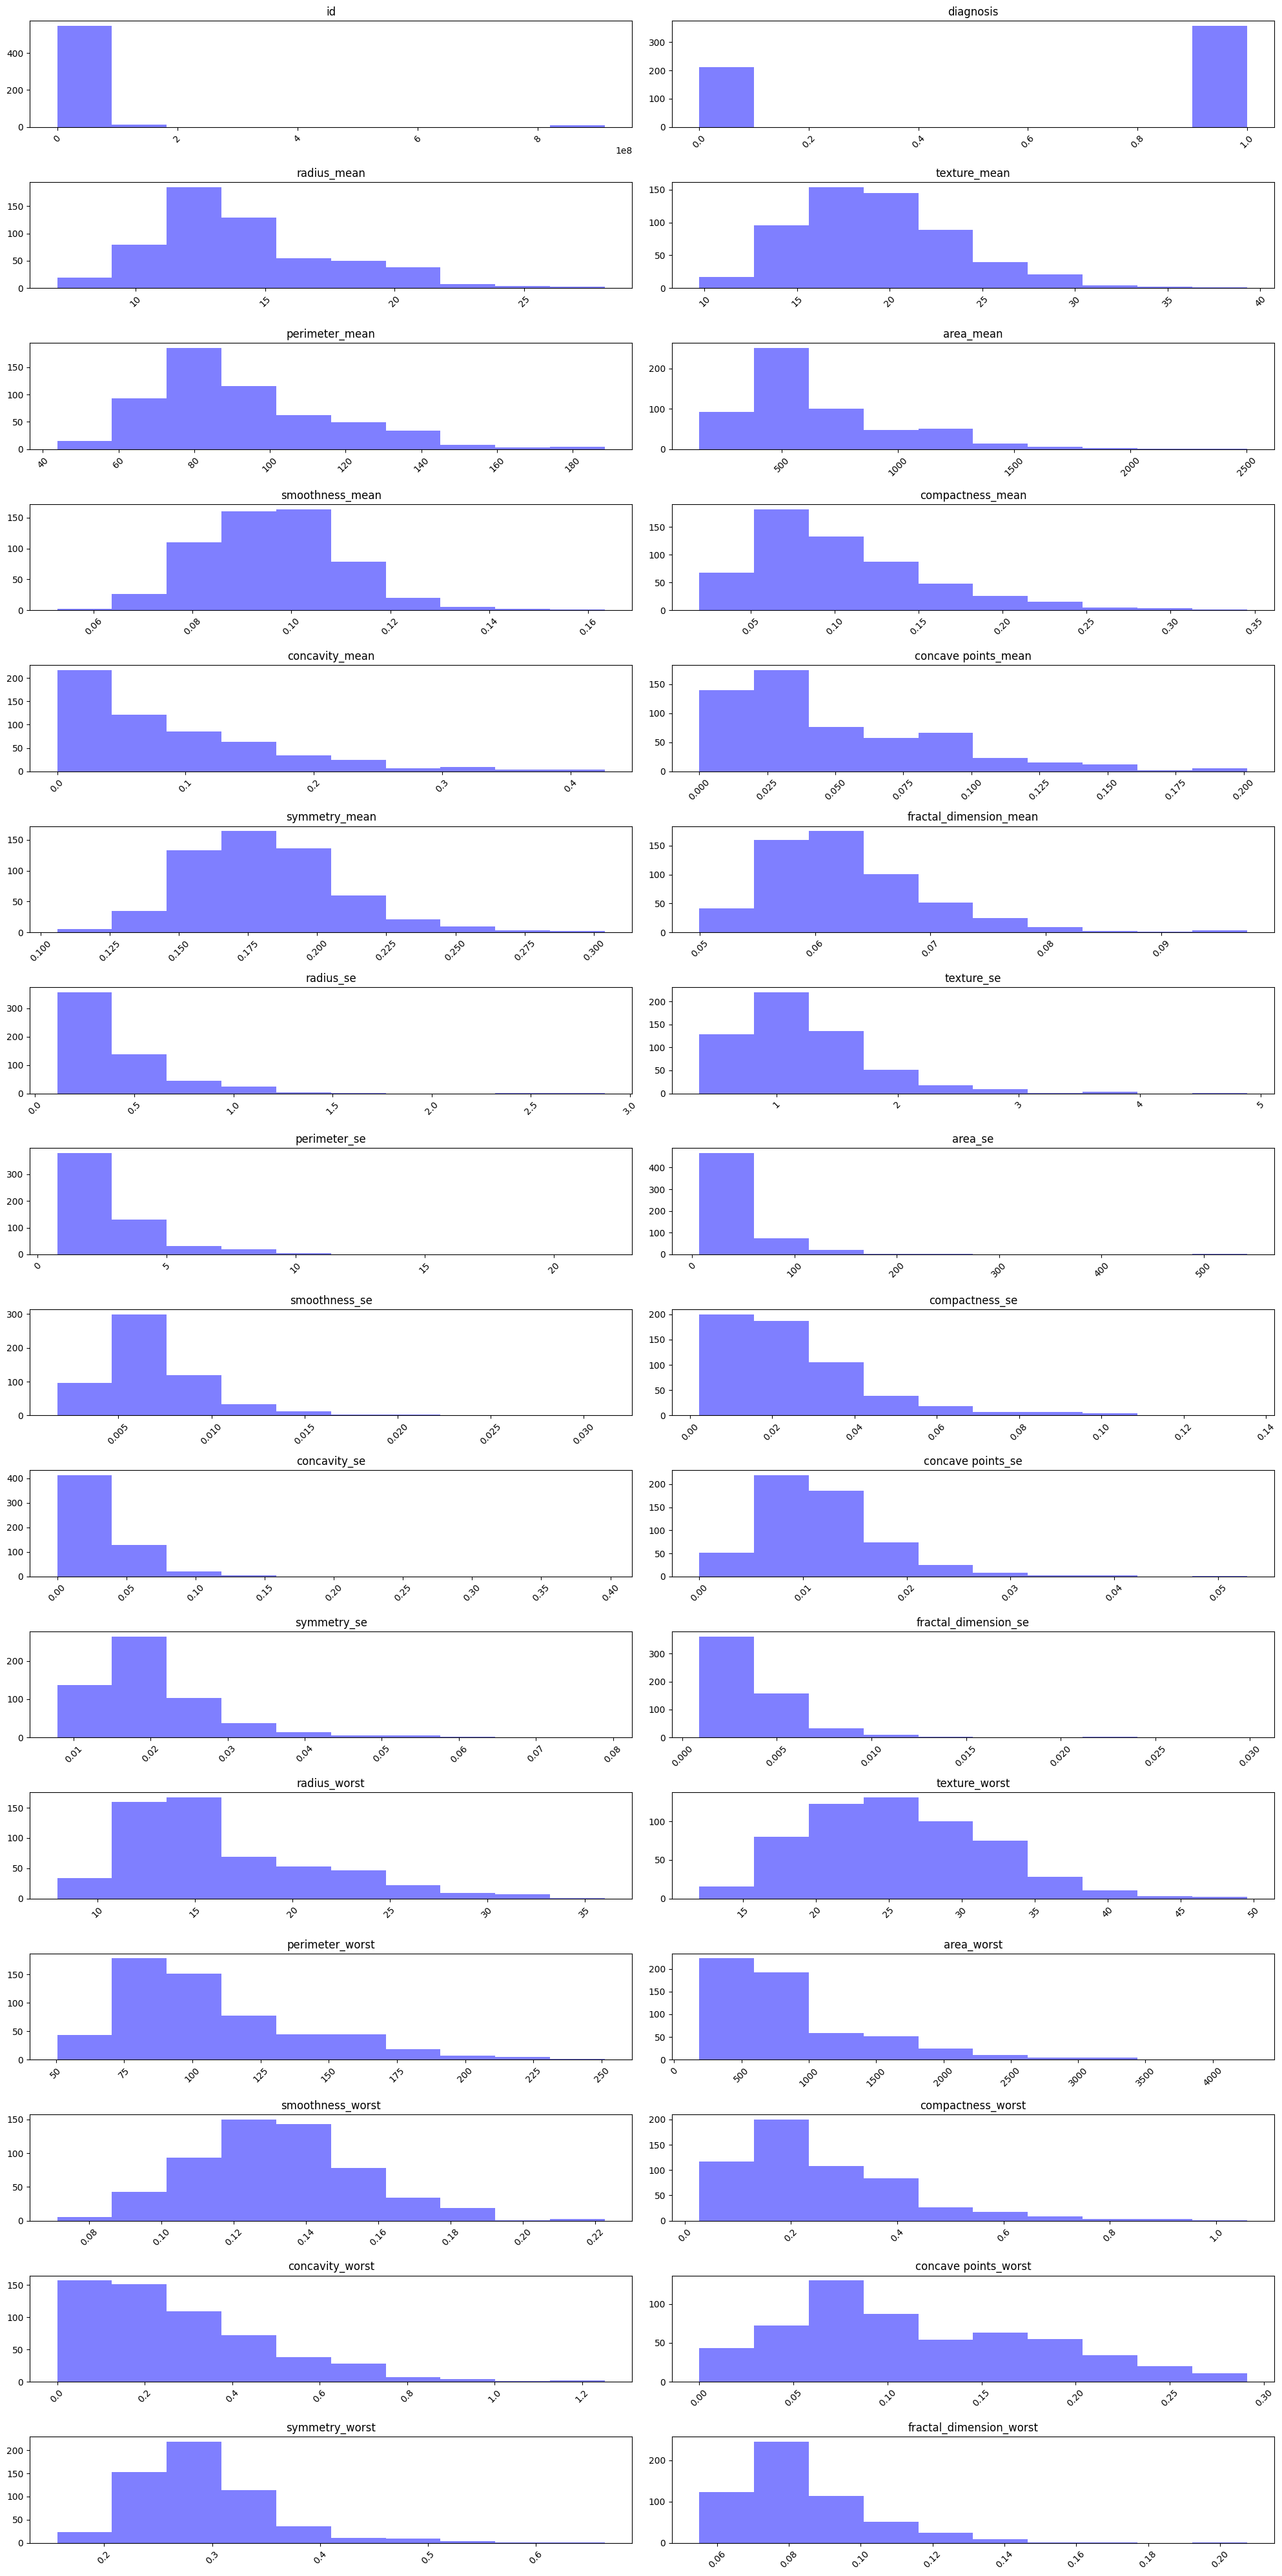

In [49]:
# Feature Distribution
num_list = list(df.columns)
rows = (len(num_list) // 2) + (len(num_list) % 2)
# Set figure size
plt.figure(figsize=(20, 40))
for i in range(len(num_list)):
    plt.subplot(rows, 2, i + 1) 
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.hist(df[num_list[i]], color='blue', alpha=0.5)
plt.tight_layout()
plt.show()

In [54]:
import pickle

# Train models (Make sure these objects exist and are trained before saving)
models = {
    "RandomForest": rf_classifier,   # No parentheses
    "SVM": svm,
    "LogisticRegression": log_reg,
    "KNN": knn,
    "DecisionTree": tree,
    "NaiveBayes": nb
}

# Fit and save each model
for name, model in models.items():
    with open(f"models/model_{name}.pkl", "wb") as f:
        pickle.dump(model, f)

# # Save scaler
# with open("scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)

print("All models and scaler saved successfully!")


All models and scaler saved successfully!
